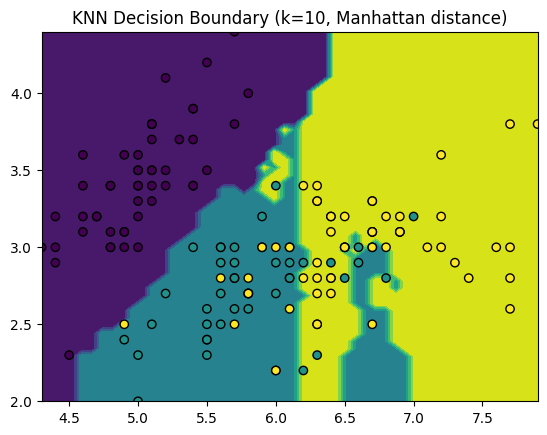

In [1]:
"""
This script demonstrates how to visualize the decision boundary of a
K-Nearest Neighbors (KNN) classifier using the Iris dataset.
It focuses on the first two features of the dataset and plots both
the decision regions and the data points.
"""

# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Load the Iris dataset
# -------------------------------------------------------------------
iris = load_iris()  # Contains 150 samples, 4 features, and 3 classes (species of Iris)

# -------------------------------------------------------------------
# Create a mesh grid covering the feature space (first two features only)
# -------------------------------------------------------------------
# np.linspace generates evenly spaced numbers between min and max values
# np.meshgrid creates coordinate matrices from coordinate vectors
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),  # Feature 1 range
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())   # Feature 2 range
)

# Stack the grid points into (N, 2) format for classifier prediction
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

# -------------------------------------------------------------------
# Train a KNN classifier
# -------------------------------------------------------------------
# Parameters:
# n_neighbors=1 → classification depends on the closest single neighbor
# p=1 → Manhattan distance metric (L1 norm)
clf = KNeighborsClassifier(n_neighbors=10, p=1).fit(iris.data[:, :2], iris.target)

# Predict labels for each point on the grid
y_pred = np.reshape(clf.predict(grid), feature_1.shape)

# -------------------------------------------------------------------
# Create and plot decision boundary display
# -------------------------------------------------------------------
DB = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
DB.plot()  # Plots colored regions representing predicted classes

# -------------------------------------------------------------------
# Overlay the actual data points
# -------------------------------------------------------------------
DB.ax_.scatter(
    iris.data[:, 0],      # Feature 1 values
    iris.data[:, 1],      # Feature 2 values
    c=iris.target,        # Color based on class label
    edgecolor="black"     # Black border for visibility
)

# Add title to the plot
DB.ax_.set_title('KNN Decision Boundary (k=10, Manhattan distance)')

# Show the final plot
plt.show()
